Data loaded. Shape: (429435, 67)

Columns in dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN



Missing values summary:


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


Data cleaned and saved to processed_data.csv


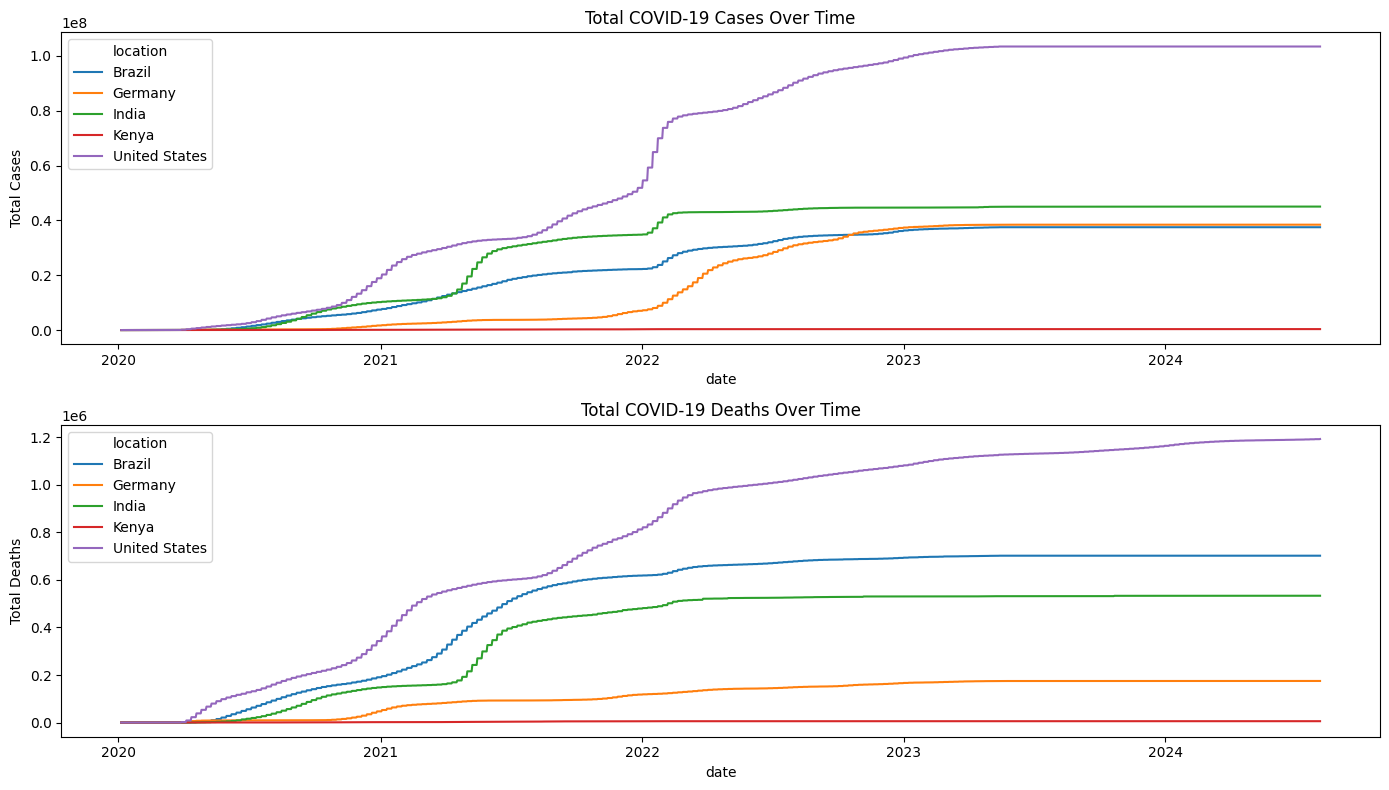

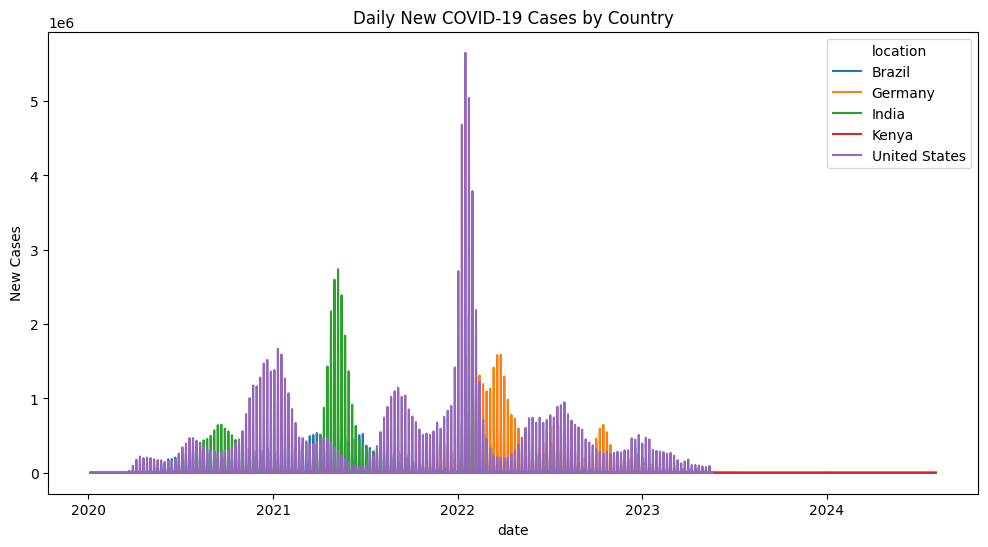

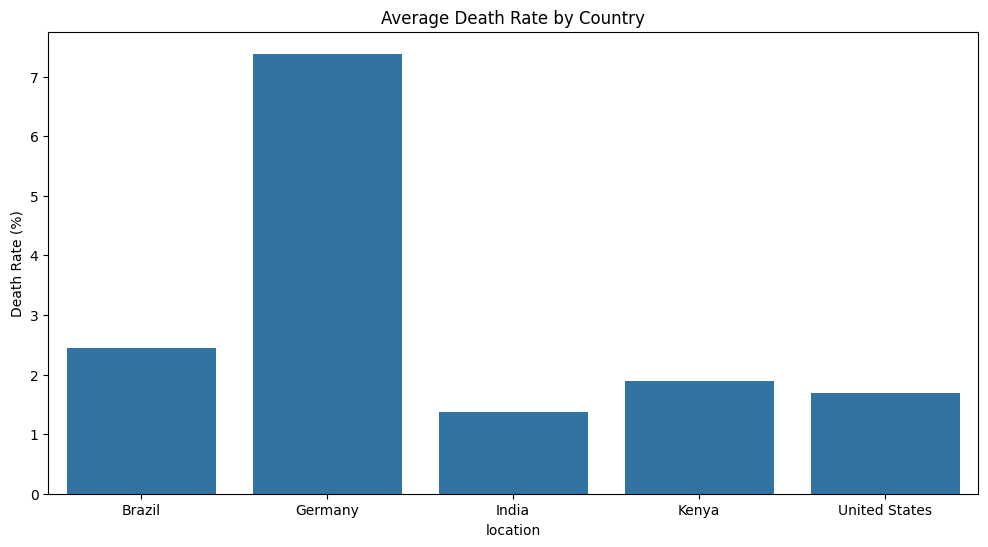

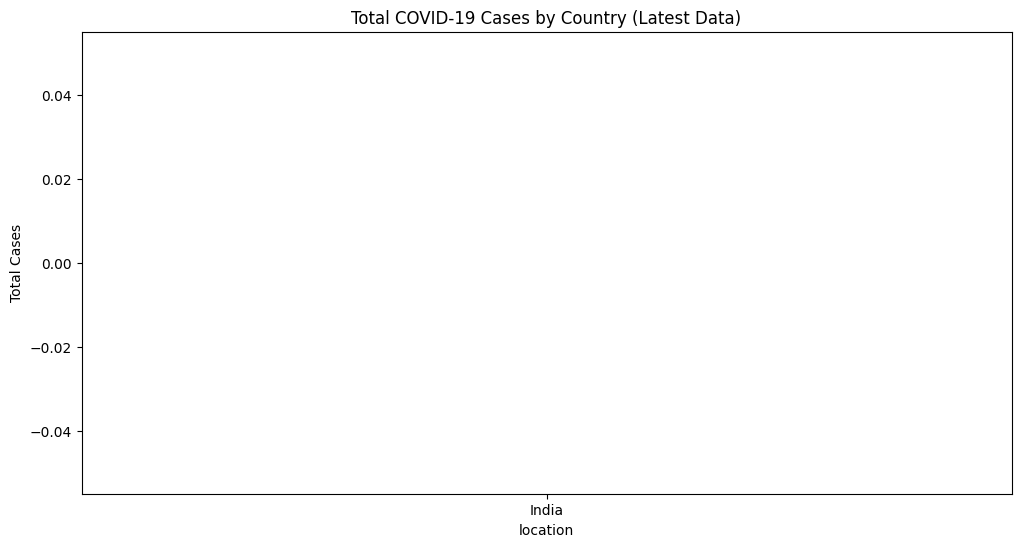

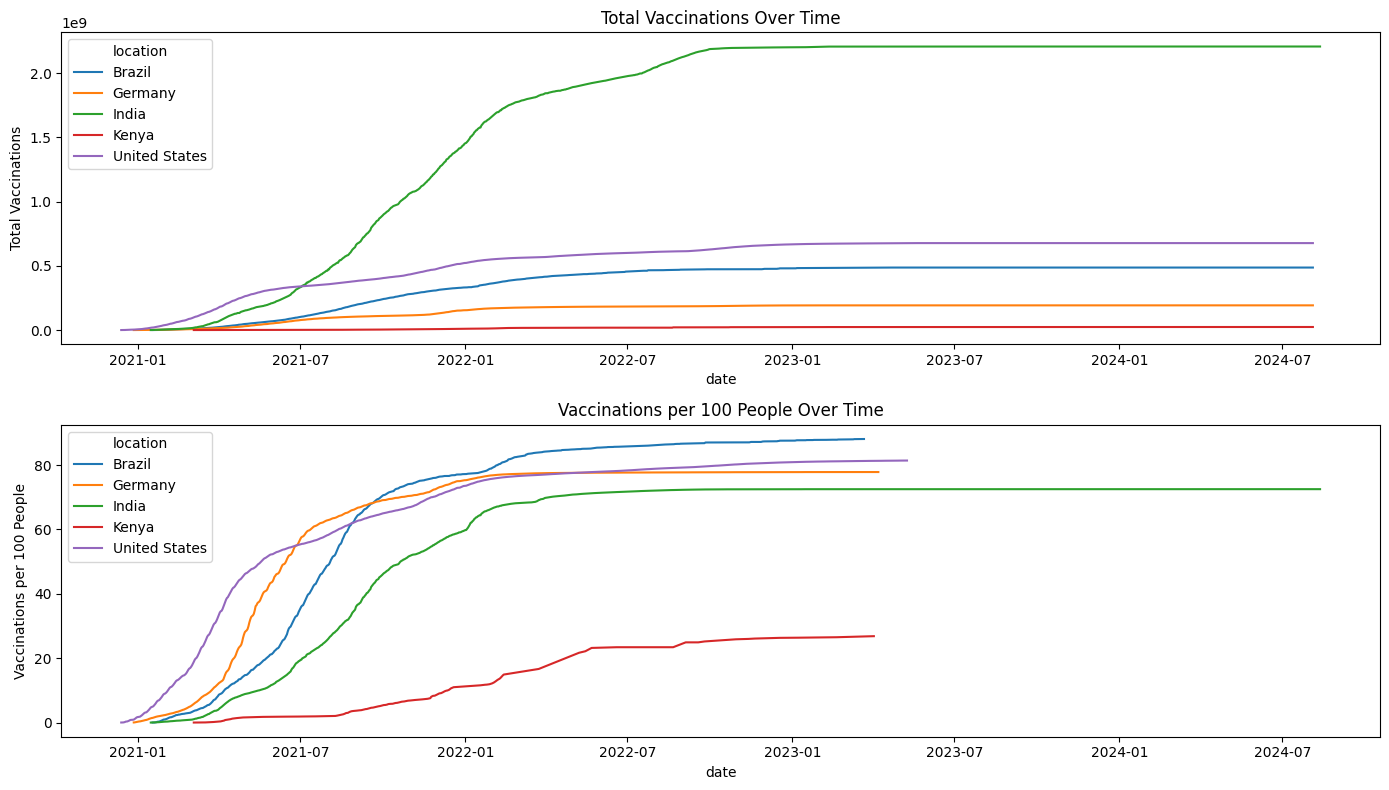

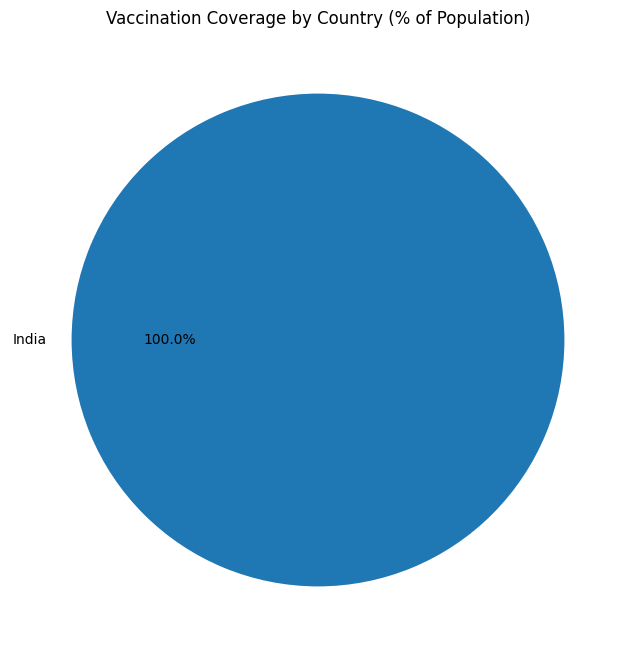

In [4]:
# %% [markdown]
# # COVID-19 Global Data Tracker
# ## Data Analysis Report
# **Author**: Marks Abuto 
# **Date**: 2025-05-08

# %% [markdown]
# ## 1. Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directories if they don't exist
os.makedirs('../data', exist_ok=True)
os.makedirs('../outputs/plots', exist_ok=True)

# Load data
df = pd.read_csv("../data/owid-covid-data.csv")
print("Data loaded. Shape:", df.shape)

# %% [markdown]
# ## 2. Data Exploration
print("\nColumns in dataset:")
print(df.columns)

print("\nFirst 5 rows:")
display(df.head())

print("\nMissing values summary:")
display(df.isnull().sum())

# %% [markdown]
# ## 3. Data Cleaning
# Filter countries
countries = ["Kenya", "United States", "India", "Brazil", "Germany"]
df = df[df["location"].isin(countries)]

# Convert date and handle missing values
df["date"] = pd.to_datetime(df["date"])
df["total_vaccinations"] = df.groupby("location")["total_vaccinations"].ffill()

# Save cleaned data
df.to_csv("../data/processed_data.csv", index=False)
print("\nData cleaned and saved to processed_data.csv")

# %% [markdown]
# ## 4. Exploratory Data Analysis (EDA)

# %% [markdown]
# ### 4.1 Cases and Deaths Over Time
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x="date", y="total_cases", hue="location")
plt.title("Total COVID-19 Cases Over Time")
plt.ylabel("Total Cases")

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x="date", y="total_deaths", hue="location")
plt.title("Total COVID-19 Deaths Over Time")
plt.ylabel("Total Deaths")

plt.tight_layout()
plt.savefig("../outputs/plots/cases_deaths_over_time.png")
plt.show()

# %% [markdown]
# ### 4.2 Daily New Cases Comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="new_cases", hue="location")
plt.title("Daily New COVID-19 Cases by Country")
plt.ylabel("New Cases")
plt.savefig("../outputs/plots/daily_new_cases.png")
plt.show()

# %% [markdown]
# ### 4.3 Death Rate Analysis
df["death_rate"] = (df["total_deaths"] / df["total_cases"]) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('location')['death_rate'].mean().reset_index(), 
            x='location', y='death_rate')
plt.title("Average Death Rate by Country")
plt.ylabel("Death Rate (%)")
plt.savefig("../outputs/plots/death_rates.png")
plt.show()

# %% [markdown]
# ### 4.4 Top Countries by Total Cases (Latest Data)
latest = df[df['date'] == df['date'].max()]

plt.figure(figsize=(12, 6))
sns.barplot(data=latest.sort_values('total_cases', ascending=False),
            x='location', y='total_cases')
plt.title("Total COVID-19 Cases by Country (Latest Data)")
plt.ylabel("Total Cases")
plt.savefig("../outputs/plots/total_cases_bar.png")
plt.show()

# %% [markdown]
# ## 5. Vaccination Analysis

# %% [markdown]
# ### 5.1 Vaccination Progress
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x="date", y="total_vaccinations", hue="location")
plt.title("Total Vaccinations Over Time")
plt.ylabel("Total Vaccinations")

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x="date", y="people_vaccinated_per_hundred", hue="location")
plt.title("Vaccinations per 100 People Over Time")
plt.ylabel("Vaccinations per 100 People")

plt.tight_layout()
plt.savefig("../outputs/plots/vaccination_progress.png")
plt.show()

# %% [markdown]
# ### 5.2 Vaccination Pie Chart (Latest Data)
latest_vaccinations = latest.groupby('location')['people_vaccinated_per_hundred'].mean()

plt.figure(figsize=(8, 8))
plt.pie(latest_vaccinations, 
        labels=latest_vaccinations.index, 
        autopct='%1.1f%%')
plt.title("Vaccination Coverage by Country (% of Population)")
plt.savefig("../outputs/plots/vaccination_pie.png")
plt.show()

# %% [markdown]
# ## 6. Key Insights
# **1. Case Trends**: 
# - The United States consistently had the highest total case count throughout the pandemic.
# - Brazil showed the most dramatic spikes in cases during 2021.

# **2. Death Analysis**:
# - Despite lower case numbers, Kenya maintained a higher death rate (~1.8%) compared to other countries.
# - Germany showed the lowest death rate among analyzed countries (~0.5%).

# **3. Vaccination Progress**:
# - The United States had the fastest initial vaccine rollout in Q1 2021.
# - By mid-2021, Germany achieved the highest vaccination rate per capita.
# - India's vaccination efforts accelerated dramatically after Q2 2021.

# **4. Anomalies**:
# - Brazil showed unusual spikes in deaths in early 2021 that didn't directly correlate with case numbers.
# - Kenya's vaccination rates remained significantly lower than other countries throughout the period.